# Import libraries and functions

In [1]:
import numpy as np  # Importing NumPy for numerical operations
import torch  # Importing PyTorch for deep learning framework
import torch.nn as nn  # Importing neural network modules from PyTorch
import torch.nn.functional as F  # Importing functional interface from PyTorch for common operations
from torch.utils.data import Dataset, DataLoader  # Importing utilities for handling data
import os  # Importing os for operating system dependent functionality like file paths
from PIL import Image  # Importing PIL for image processing
import torchvision.transforms as transforms  # Importing transformations for image preprocessing
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import math  # Importing math for mathematical operations

# Ensure notebook be able to call functions from utils.py
import sys
sys.path.append('/kaggle/input/get-ready-to-git-overpara')  # Add the directory to the system path
from utils import pad_image, extract_patches, reconstruct_image_from_patches, save_reconstructed_image, Overparametrization_train, save_trained_overparametrization_model, load_trained_model
from data import load_and_preprocess_data

# Define hyperparameters

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
normalised_size = (70, 70)  # Used for reshaping images
numEpochs = 150  # Number of training epochs
numLayers = 1  # Number of layers in the LISTA model
learning_rate = 3e-4  # Learning rate for the optimizer

# Load datasets

In [3]:
# Directory paths
clear_train_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_training_dataset'
clear_valid_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_validation_dataset'
noisy_train_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_training_dataset'
noisy_valid_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_validation_dataset'

# Load and preprocess data
noisy_train_images, clear_train_images, noisy_valid_images, clear_valid_images, \
noisy_train_filenames, clear_train_filenames, noisy_valid_filenames, clear_valid_filenames = load_and_preprocess_data(
    clear_train_dir, clear_valid_dir, noisy_train_dir, noisy_valid_dir)

# Convert PyTorch tensors to NumPy arrays
X1 = clear_train_images.numpy()  # Ground truth training images
Y1 = noisy_train_images.numpy()  # Noisy training images
X2 = clear_valid_images.numpy()  # Ground truth validation images
Y2 = noisy_valid_images.numpy()  # Noisy validation images

print(f'X1 has shape {X1.shape}')
print(f'Y1 has shape {Y1.shape}')
print(f'X2 has shape {X2.shape}')
print(f'Y2 has shape {Y2.shape}')


Defining transformation...
Loading and preprocessing clear training images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_training_dataset...
Finished loading clear training images.
Loading and preprocessing clear validation images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_validation_dataset...
Finished loading clear validation images.
Loading and preprocessing noisy training images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_training_dataset...
Finished loading noisy training images.
Loading and preprocessing noisy validation images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_validation_dataset...
Finished loading noisy validation images.
X1 has shape (14700, 160)
Y1 has shape (14700, 160)
X2 has shape (14700, 20)
Y2 has shape (14700, 20)


# Train and validate the model

There are 160 images in the training dataset
There are 20 images in the validation dataset


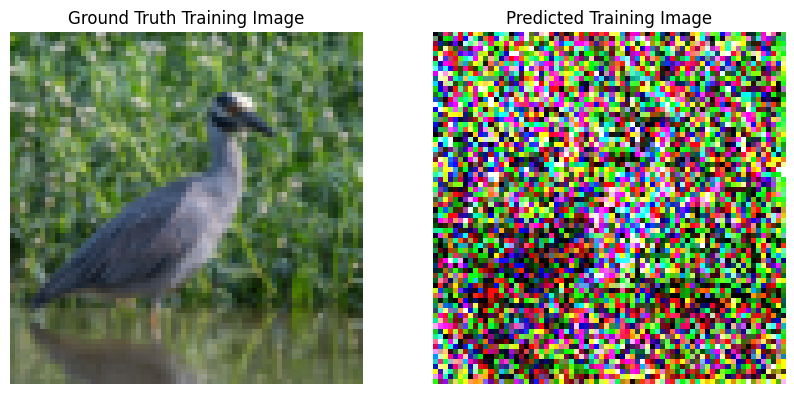

Epoch 1: _lambda1 (processed) = 0.9024022817611694, _lambda2 (processed) = 0.10236229002475739


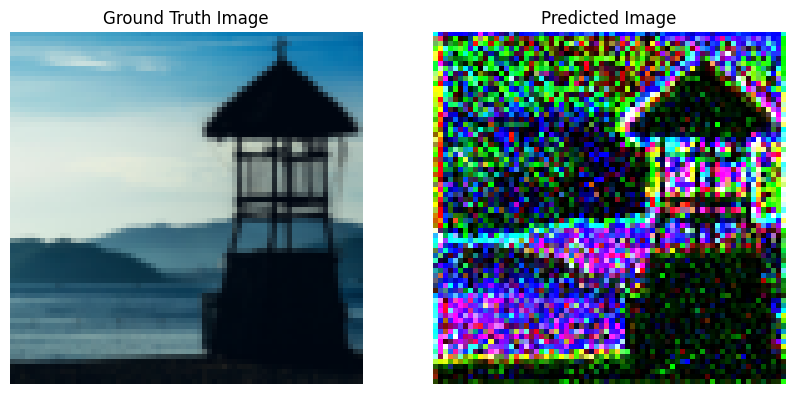

Epoch 1/150, Train Loss: 0.2717762179672718, Validation Loss: 0.19122496247291565
Epoch 2: _lambda1 (processed) = 0.9047257900238037, _lambda2 (processed) = 0.1048097237944603
Epoch 3: _lambda1 (processed) = 0.90666663646698, _lambda2 (processed) = 0.10719779878854752
Epoch 4: _lambda1 (processed) = 0.9078570604324341, _lambda2 (processed) = 0.10949348658323288
Epoch 5: _lambda1 (processed) = 0.9080483317375183, _lambda2 (processed) = 0.11131108552217484
Epoch 6: _lambda1 (processed) = 0.9076299667358398, _lambda2 (processed) = 0.11293570697307587
Epoch 7: _lambda1 (processed) = 0.9066644310951233, _lambda2 (processed) = 0.11449449509382248
Epoch 8: _lambda1 (processed) = 0.9055773615837097, _lambda2 (processed) = 0.11615802347660065
Epoch 9: _lambda1 (processed) = 0.904270350933075, _lambda2 (processed) = 0.11771303415298462
Epoch 10: _lambda1 (processed) = 0.9029276371002197, _lambda2 (processed) = 0.11933130025863647


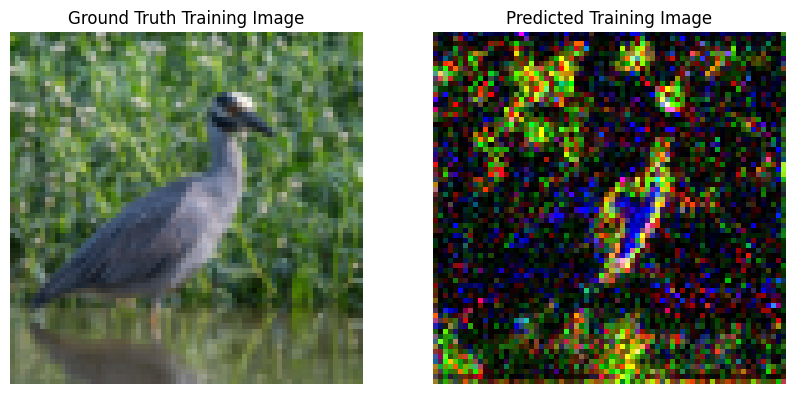

Epoch 11: _lambda1 (processed) = 0.901726245880127, _lambda2 (processed) = 0.12105482071638107


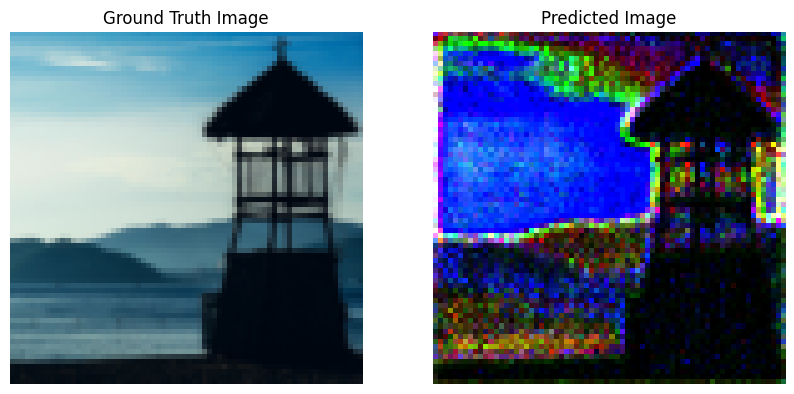

Epoch 11/150, Train Loss: 0.07089258916676044, Validation Loss: 0.08217209577560425
Epoch 12: _lambda1 (processed) = 0.9003520607948303, _lambda2 (processed) = 0.12249800562858582
Epoch 13: _lambda1 (processed) = 0.8991595506668091, _lambda2 (processed) = 0.12414999306201935
Epoch 14: _lambda1 (processed) = 0.8979063630104065, _lambda2 (processed) = 0.12566982209682465
Epoch 15: _lambda1 (processed) = 0.8966985940933228, _lambda2 (processed) = 0.12728290259838104
Epoch 16: _lambda1 (processed) = 0.8955419659614563, _lambda2 (processed) = 0.12895579636096954
Epoch 17: _lambda1 (processed) = 0.8942223787307739, _lambda2 (processed) = 0.13045109808444977
Epoch 18: _lambda1 (processed) = 0.8930973410606384, _lambda2 (processed) = 0.132035493850708
Epoch 19: _lambda1 (processed) = 0.891998291015625, _lambda2 (processed) = 0.13361501693725586
Epoch 20: _lambda1 (processed) = 0.8908554315567017, _lambda2 (processed) = 0.13508689403533936


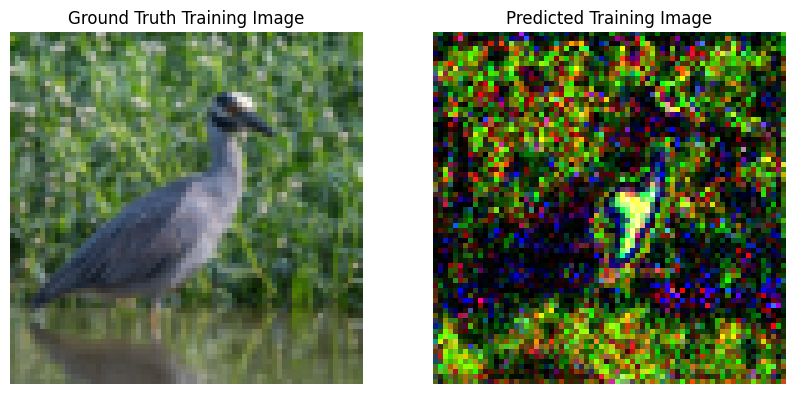

Epoch 21: _lambda1 (processed) = 0.8898897767066956, _lambda2 (processed) = 0.13672994077205658


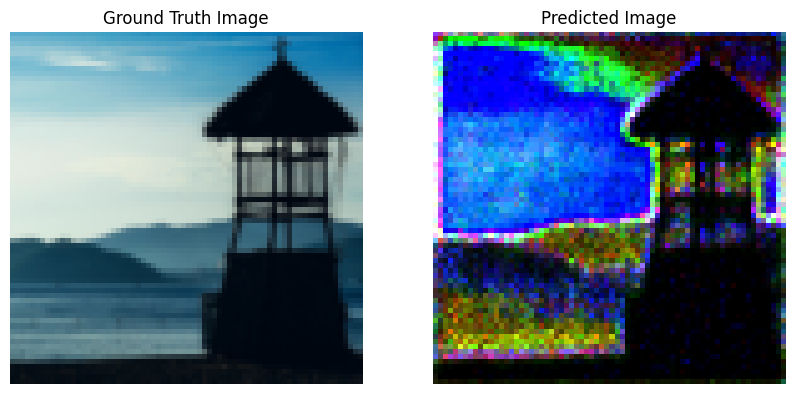

Epoch 21/150, Train Loss: 0.057578383944928646, Validation Loss: 0.06985251605510712
Epoch 22: _lambda1 (processed) = 0.8888673186302185, _lambda2 (processed) = 0.13835026323795319
Epoch 23: _lambda1 (processed) = 0.887792706489563, _lambda2 (processed) = 0.13985662162303925
Epoch 24: _lambda1 (processed) = 0.8868359327316284, _lambda2 (processed) = 0.1414283961057663
Epoch 25: _lambda1 (processed) = 0.8857447504997253, _lambda2 (processed) = 0.14280593395233154
Epoch 26: _lambda1 (processed) = 0.8846136331558228, _lambda2 (processed) = 0.1441502571105957
Epoch 27: _lambda1 (processed) = 0.8834983706474304, _lambda2 (processed) = 0.14562423527240753
Epoch 28: _lambda1 (processed) = 0.8822683691978455, _lambda2 (processed) = 0.14702792465686798
Epoch 29: _lambda1 (processed) = 0.8811710476875305, _lambda2 (processed) = 0.1483948677778244
Epoch 30: _lambda1 (processed) = 0.8801628947257996, _lambda2 (processed) = 0.14982669055461884


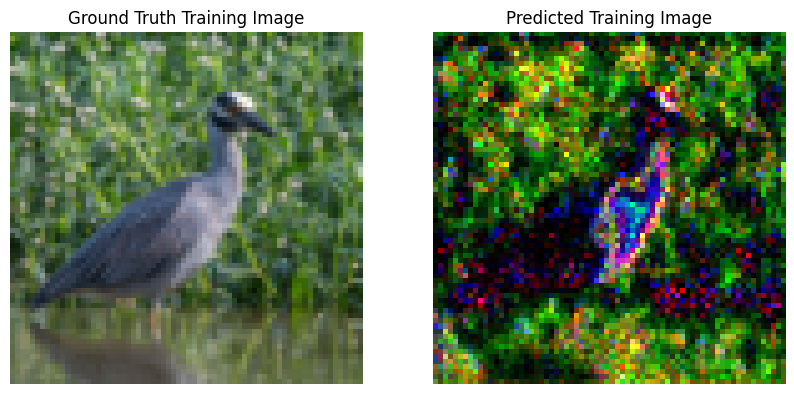

Epoch 31: _lambda1 (processed) = 0.8791239857673645, _lambda2 (processed) = 0.15118946135044098


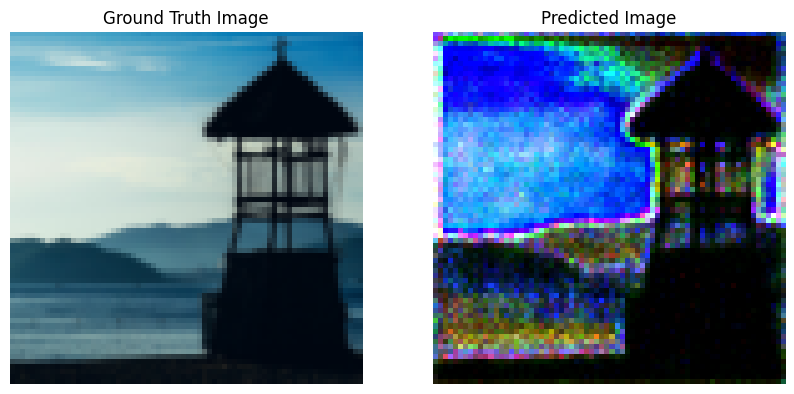

Epoch 31/150, Train Loss: 0.04657521331682801, Validation Loss: 0.06090737506747246
Epoch 32: _lambda1 (processed) = 0.878090500831604, _lambda2 (processed) = 0.1525145024061203
Epoch 33: _lambda1 (processed) = 0.8771873712539673, _lambda2 (processed) = 0.15387021005153656
Epoch 34: _lambda1 (processed) = 0.8763338327407837, _lambda2 (processed) = 0.15510614216327667
Epoch 35: _lambda1 (processed) = 0.8756248354911804, _lambda2 (processed) = 0.1564953625202179
Epoch 36: _lambda1 (processed) = 0.8748720288276672, _lambda2 (processed) = 0.15793254971504211
Epoch 37: _lambda1 (processed) = 0.8738541603088379, _lambda2 (processed) = 0.15908478200435638
Epoch 38: _lambda1 (processed) = 0.8729480504989624, _lambda2 (processed) = 0.16025494039058685
Epoch 39: _lambda1 (processed) = 0.8721476197242737, _lambda2 (processed) = 0.16150151193141937
Epoch 40: _lambda1 (processed) = 0.8714355826377869, _lambda2 (processed) = 0.16275158524513245


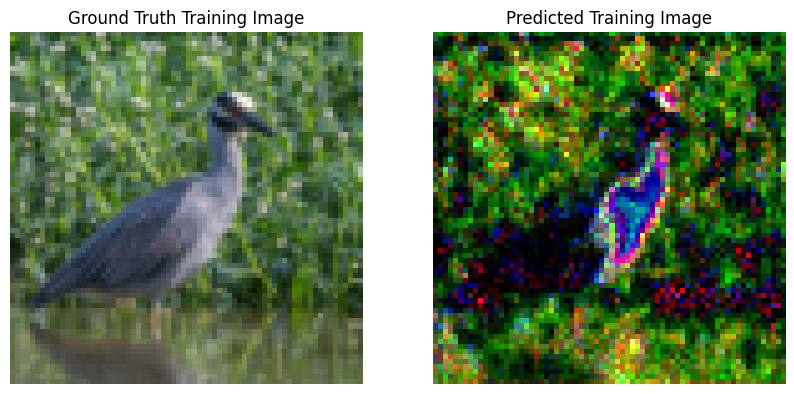

Epoch 41: _lambda1 (processed) = 0.8708257079124451, _lambda2 (processed) = 0.16413481533527374


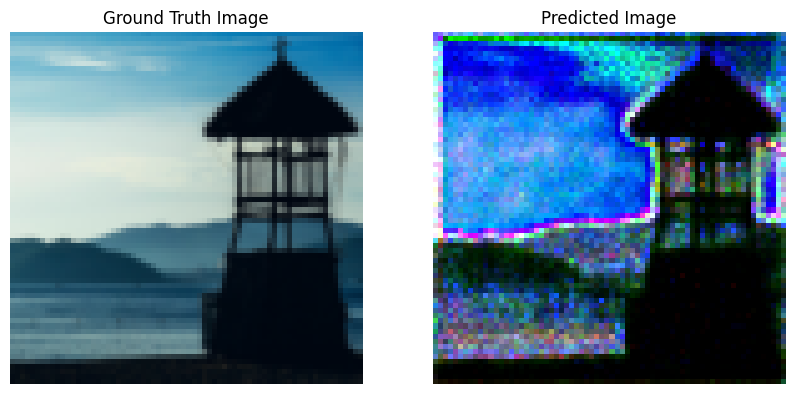

Epoch 41/150, Train Loss: 0.04518500715494156, Validation Loss: 0.0545586533844471
Epoch 42: _lambda1 (processed) = 0.8698770999908447, _lambda2 (processed) = 0.1652880609035492
Epoch 43: _lambda1 (processed) = 0.8690667152404785, _lambda2 (processed) = 0.16644006967544556
Epoch 44: _lambda1 (processed) = 0.8684619665145874, _lambda2 (processed) = 0.1677371710538864
Epoch 45: _lambda1 (processed) = 0.8677043914794922, _lambda2 (processed) = 0.1688392013311386
Epoch 46: _lambda1 (processed) = 0.8669493198394775, _lambda2 (processed) = 0.16985847055912018
Epoch 47: _lambda1 (processed) = 0.8663875460624695, _lambda2 (processed) = 0.17115406692028046
Epoch 48: _lambda1 (processed) = 0.8656426668167114, _lambda2 (processed) = 0.17215676605701447
Epoch 49: _lambda1 (processed) = 0.8651809096336365, _lambda2 (processed) = 0.17336232960224152
Epoch 50: _lambda1 (processed) = 0.8646692633628845, _lambda2 (processed) = 0.17448550462722778


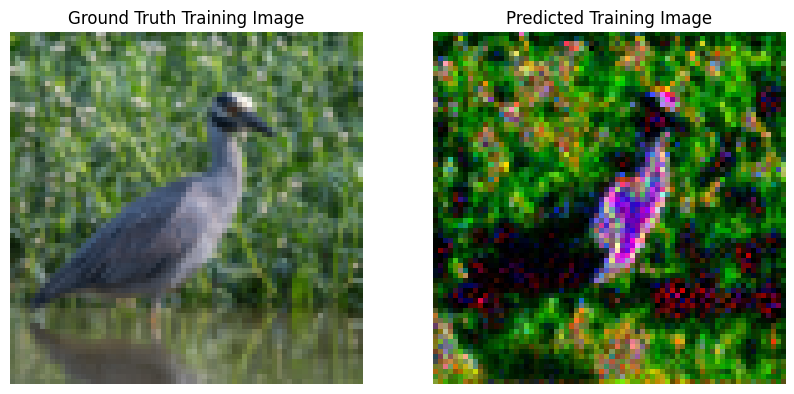

Epoch 51: _lambda1 (processed) = 0.8640276789665222, _lambda2 (processed) = 0.17549702525138855


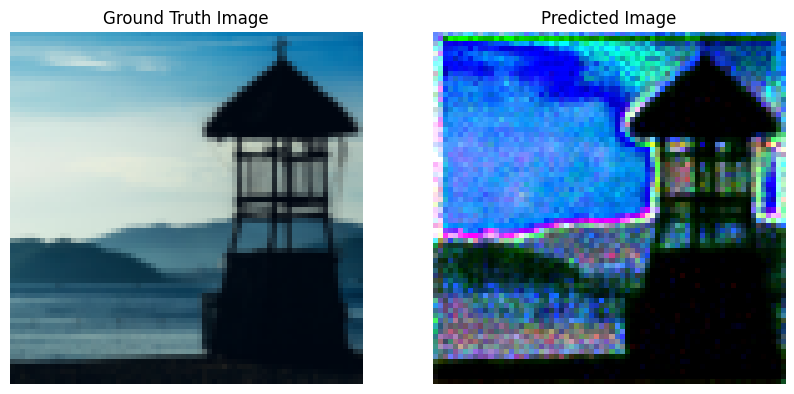

Epoch 51/150, Train Loss: 0.04076204868033528, Validation Loss: 0.0526987686753273
Epoch 52: _lambda1 (processed) = 0.8635786771774292, _lambda2 (processed) = 0.17664207518100739
Epoch 53: _lambda1 (processed) = 0.8633294105529785, _lambda2 (processed) = 0.1779595911502838
Epoch 54: _lambda1 (processed) = 0.8626832365989685, _lambda2 (processed) = 0.17907416820526123
Epoch 55: _lambda1 (processed) = 0.8621911406517029, _lambda2 (processed) = 0.18008752167224884
Epoch 56: _lambda1 (processed) = 0.8619031310081482, _lambda2 (processed) = 0.18134984374046326
Epoch 57: _lambda1 (processed) = 0.8614352345466614, _lambda2 (processed) = 0.18241101503372192
Epoch 58: _lambda1 (processed) = 0.8611008524894714, _lambda2 (processed) = 0.1834830492734909
Epoch 59: _lambda1 (processed) = 0.8604351282119751, _lambda2 (processed) = 0.18429994583129883
Epoch 60: _lambda1 (processed) = 0.8601862192153931, _lambda2 (processed) = 0.18552927672863007


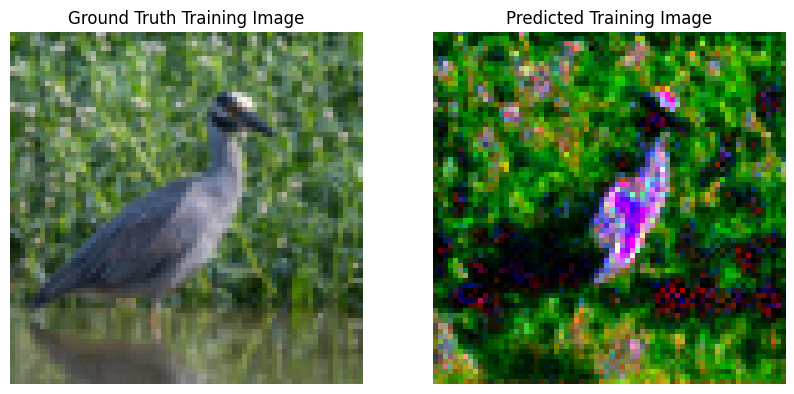

Epoch 61: _lambda1 (processed) = 0.8596681952476501, _lambda2 (processed) = 0.18641839921474457


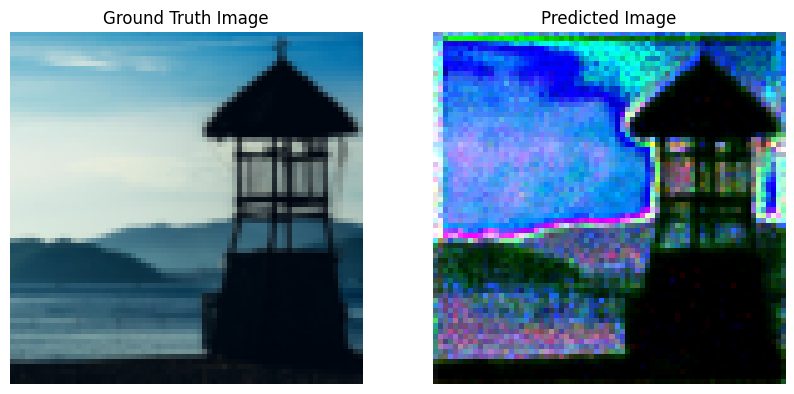

Epoch 61/150, Train Loss: 0.035835749469697475, Validation Loss: 0.04872850328683853
Epoch 62: _lambda1 (processed) = 0.8593611121177673, _lambda2 (processed) = 0.1874762326478958
Epoch 63: _lambda1 (processed) = 0.8591511845588684, _lambda2 (processed) = 0.18857207894325256
Epoch 64: _lambda1 (processed) = 0.8587814569473267, _lambda2 (processed) = 0.18959057331085205
Epoch 65: _lambda1 (processed) = 0.8583182096481323, _lambda2 (processed) = 0.1905646026134491
Epoch 66: _lambda1 (processed) = 0.858069121837616, _lambda2 (processed) = 0.19153544306755066
Epoch 67: _lambda1 (processed) = 0.8578196167945862, _lambda2 (processed) = 0.19258412718772888
Epoch 68: _lambda1 (processed) = 0.8573482632637024, _lambda2 (processed) = 0.19348566234111786
Epoch 69: _lambda1 (processed) = 0.8573475480079651, _lambda2 (processed) = 0.19476664066314697
Epoch 70: _lambda1 (processed) = 0.8569819331169128, _lambda2 (processed) = 0.195665642619133


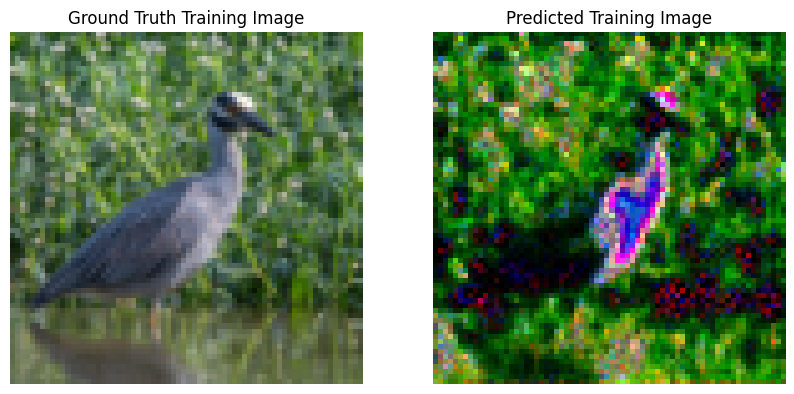

Epoch 71: _lambda1 (processed) = 0.8569190502166748, _lambda2 (processed) = 0.19669604301452637


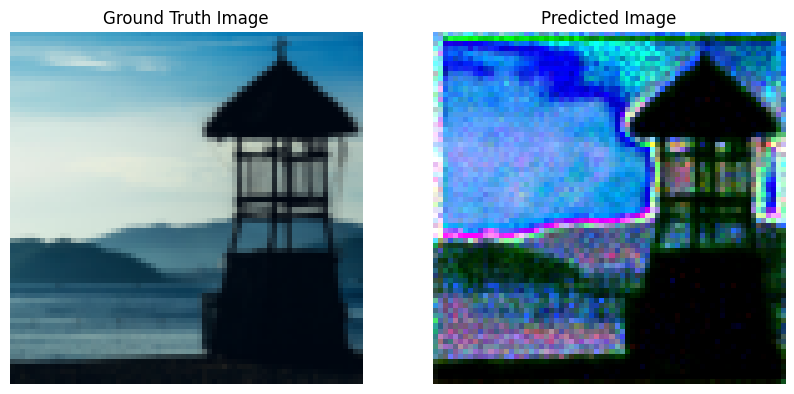

Epoch 71/150, Train Loss: 0.032910545356571674, Validation Loss: 0.04614724591374397
Epoch 72: _lambda1 (processed) = 0.8567267060279846, _lambda2 (processed) = 0.19773834943771362
Epoch 73: _lambda1 (processed) = 0.856486976146698, _lambda2 (processed) = 0.1986451894044876
Epoch 74: _lambda1 (processed) = 0.8559291958808899, _lambda2 (processed) = 0.1994495689868927
Epoch 75: _lambda1 (processed) = 0.8559501767158508, _lambda2 (processed) = 0.20059488713741302
Epoch 76: _lambda1 (processed) = 0.8557820320129395, _lambda2 (processed) = 0.20077668130397797
Epoch 77: _lambda1 (processed) = 0.8556936383247375, _lambda2 (processed) = 0.2010217308998108
Epoch 78: _lambda1 (processed) = 0.8557005524635315, _lambda2 (processed) = 0.2012781798839569
Epoch 79: _lambda1 (processed) = 0.8556870222091675, _lambda2 (processed) = 0.20151707530021667
Epoch 80: _lambda1 (processed) = 0.8556605577468872, _lambda2 (processed) = 0.2017715573310852


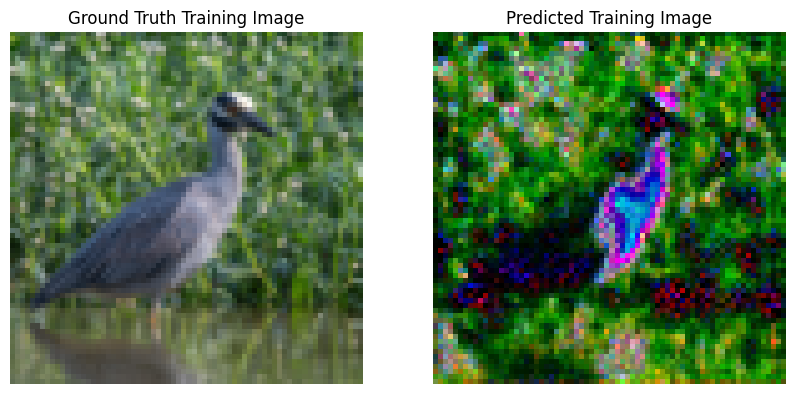

Epoch 81: _lambda1 (processed) = 0.8555416464805603, _lambda2 (processed) = 0.20194007456302643


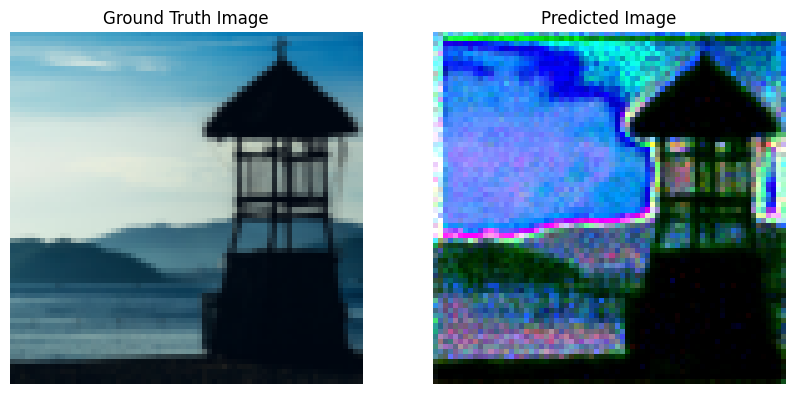

Epoch 81/150, Train Loss: 0.03320194943808019, Validation Loss: 0.04520720988512039
Epoch 82: _lambda1 (processed) = 0.8555747270584106, _lambda2 (processed) = 0.20222605764865875
Epoch 83: _lambda1 (processed) = 0.8554871082305908, _lambda2 (processed) = 0.20242515206336975
Epoch 84: _lambda1 (processed) = 0.8554999232292175, _lambda2 (processed) = 0.20270110666751862
Epoch 85: _lambda1 (processed) = 0.8555960655212402, _lambda2 (processed) = 0.20302872359752655
Epoch 86: _lambda1 (processed) = 0.855546772480011, _lambda2 (processed) = 0.20323680341243744
Epoch 87: _lambda1 (processed) = 0.8554842472076416, _lambda2 (processed) = 0.2034459114074707
Epoch 88: _lambda1 (processed) = 0.8554651141166687, _lambda2 (processed) = 0.20366959273815155
Epoch 89: _lambda1 (processed) = 0.8554701209068298, _lambda2 (processed) = 0.2039119452238083
Epoch 90: _lambda1 (processed) = 0.855295717716217, _lambda2 (processed) = 0.20401670038700104


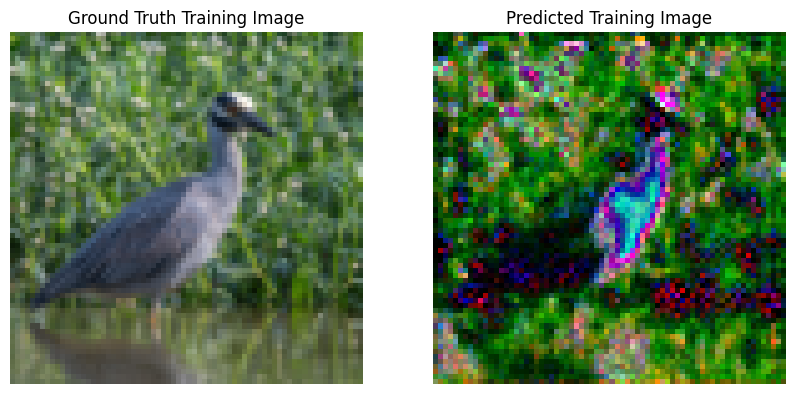

Epoch 91: _lambda1 (processed) = 0.8552364110946655, _lambda2 (processed) = 0.20424334704875946


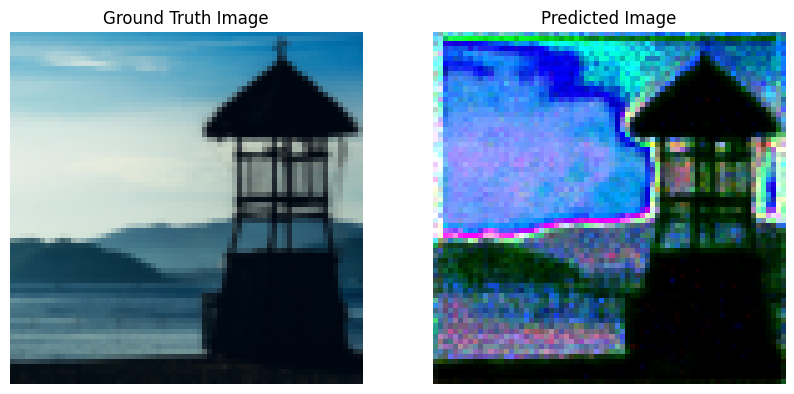

Epoch 91/150, Train Loss: 0.030685869278386235, Validation Loss: 0.044314466416835785
Epoch 92: _lambda1 (processed) = 0.8552112579345703, _lambda2 (processed) = 0.2044779658317566
Epoch 93: _lambda1 (processed) = 0.8551949262619019, _lambda2 (processed) = 0.20470178127288818
Epoch 94: _lambda1 (processed) = 0.8551532030105591, _lambda2 (processed) = 0.20491217076778412
Epoch 95: _lambda1 (processed) = 0.8551416397094727, _lambda2 (processed) = 0.2051311433315277
Epoch 96: _lambda1 (processed) = 0.855077862739563, _lambda2 (processed) = 0.2053450495004654
Epoch 97: _lambda1 (processed) = 0.8550408482551575, _lambda2 (processed) = 0.20558051764965057
Epoch 98: _lambda1 (processed) = 0.8550274968147278, _lambda2 (processed) = 0.20583653450012207
Epoch 99: _lambda1 (processed) = 0.8549185395240784, _lambda2 (processed) = 0.20600849390029907
Epoch 100: _lambda1 (processed) = 0.854827880859375, _lambda2 (processed) = 0.20621147751808167


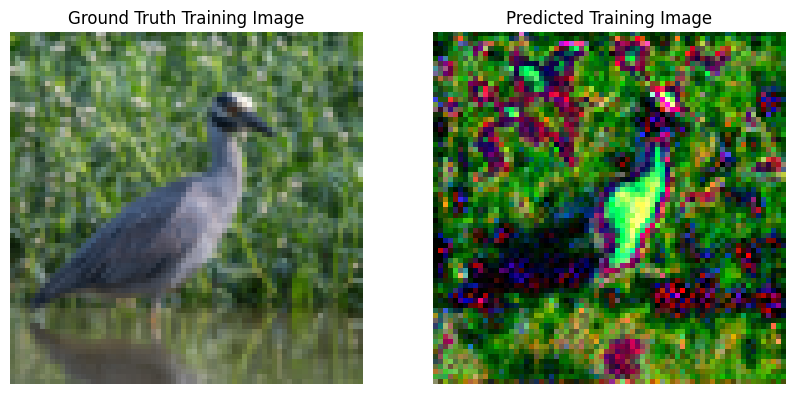

Epoch 101: _lambda1 (processed) = 0.8547560572624207, _lambda2 (processed) = 0.20638655126094818


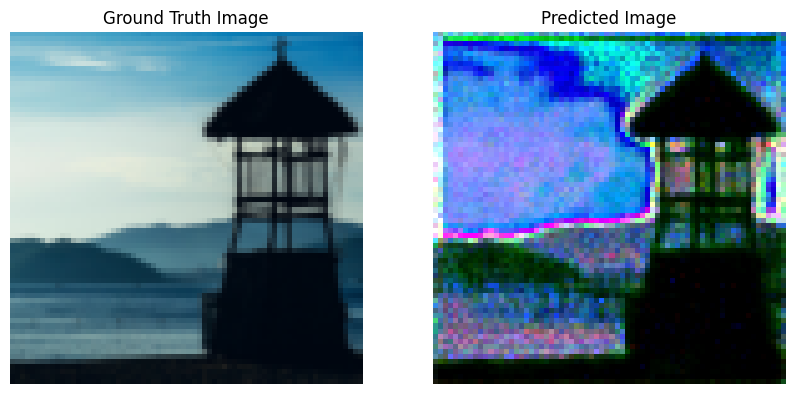

Epoch 101/150, Train Loss: 0.03221869911067188, Validation Loss: 0.04352209344506264
Epoch 102: _lambda1 (processed) = 0.8547157049179077, _lambda2 (processed) = 0.20658546686172485
Epoch 103: _lambda1 (processed) = 0.8547297120094299, _lambda2 (processed) = 0.2068350911140442
Epoch 104: _lambda1 (processed) = 0.8546751737594604, _lambda2 (processed) = 0.20700368285179138
Epoch 105: _lambda1 (processed) = 0.8547133207321167, _lambda2 (processed) = 0.20727308094501495
Epoch 106: _lambda1 (processed) = 0.8547239303588867, _lambda2 (processed) = 0.2075119912624359
Epoch 107: _lambda1 (processed) = 0.8546414971351624, _lambda2 (processed) = 0.20768894255161285
Epoch 108: _lambda1 (processed) = 0.8545563220977783, _lambda2 (processed) = 0.2078634351491928
Epoch 109: _lambda1 (processed) = 0.8545733094215393, _lambda2 (processed) = 0.20812535285949707
Epoch 110: _lambda1 (processed) = 0.8545634746551514, _lambda2 (processed) = 0.20834021270275116


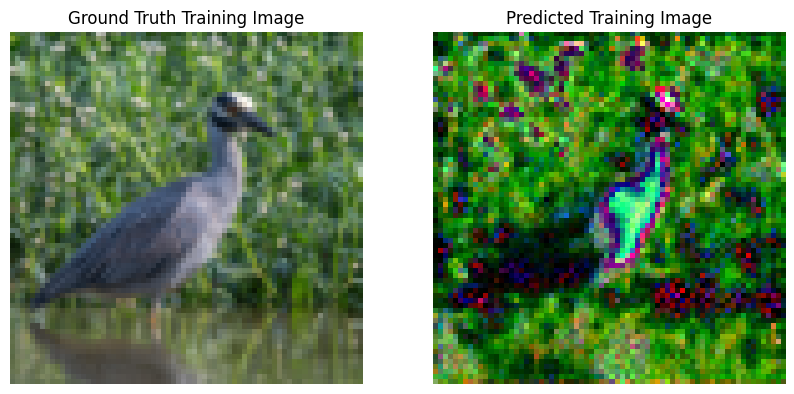

Epoch 111: _lambda1 (processed) = 0.8545436263084412, _lambda2 (processed) = 0.20856598019599915


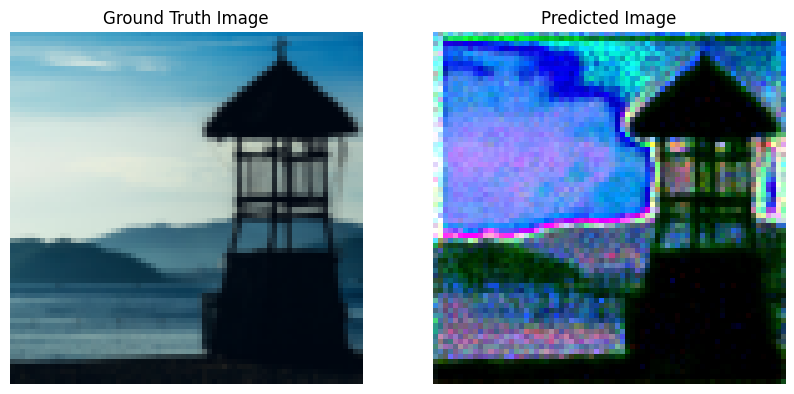

Epoch 111/150, Train Loss: 0.03001050534658134, Validation Loss: 0.04278695210814476
Epoch 112: _lambda1 (processed) = 0.8544968962669373, _lambda2 (processed) = 0.2087467759847641
Epoch 113: _lambda1 (processed) = 0.8544847965240479, _lambda2 (processed) = 0.20875917375087738
Epoch 114: _lambda1 (processed) = 0.8544849753379822, _lambda2 (processed) = 0.20878398418426514
Epoch 115: _lambda1 (processed) = 0.8544946908950806, _lambda2 (processed) = 0.2088150680065155
Epoch 116: _lambda1 (processed) = 0.8544973134994507, _lambda2 (processed) = 0.20884178578853607
Epoch 117: _lambda1 (processed) = 0.8544973134994507, _lambda2 (processed) = 0.2088649421930313
Epoch 118: _lambda1 (processed) = 0.8545044660568237, _lambda2 (processed) = 0.20889243483543396
Epoch 119: _lambda1 (processed) = 0.8545049428939819, _lambda2 (processed) = 0.20891641080379486
Epoch 120: _lambda1 (processed) = 0.854503333568573, _lambda2 (processed) = 0.20893950760364532


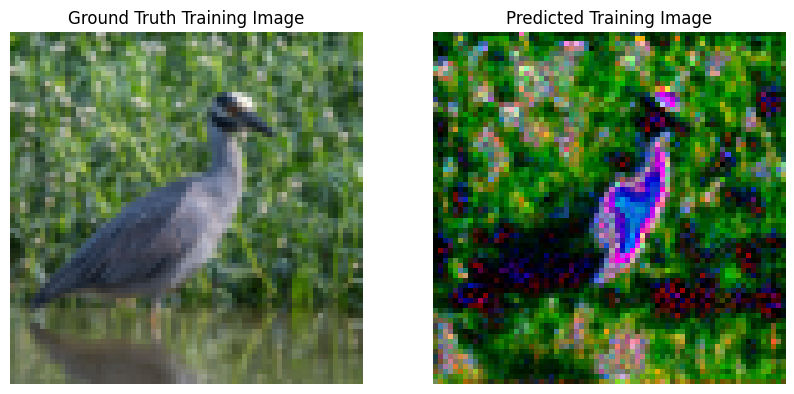

Epoch 121: _lambda1 (processed) = 0.8545023202896118, _lambda2 (processed) = 0.2089630514383316


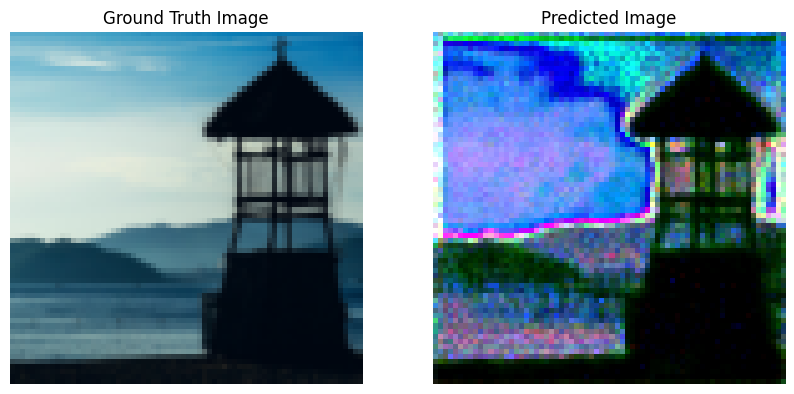

Epoch 121/150, Train Loss: 0.027618552558124065, Validation Loss: 0.04235150292515755
Epoch 122: _lambda1 (processed) = 0.8545051217079163, _lambda2 (processed) = 0.20898781716823578
Epoch 123: _lambda1 (processed) = 0.8545112609863281, _lambda2 (processed) = 0.20901590585708618
Epoch 124: _lambda1 (processed) = 0.8545216917991638, _lambda2 (processed) = 0.20904721319675446
Epoch 125: _lambda1 (processed) = 0.854527473449707, _lambda2 (processed) = 0.20907378196716309
Epoch 126: _lambda1 (processed) = 0.8545305132865906, _lambda2 (processed) = 0.2091009020805359
Epoch 127: _lambda1 (processed) = 0.854527473449707, _lambda2 (processed) = 0.2091207057237625
Epoch 128: _lambda1 (processed) = 0.8545322418212891, _lambda2 (processed) = 0.20914798974990845
Epoch 129: _lambda1 (processed) = 0.8545297980308533, _lambda2 (processed) = 0.20917220413684845
Epoch 130: _lambda1 (processed) = 0.854533314704895, _lambda2 (processed) = 0.20920035243034363


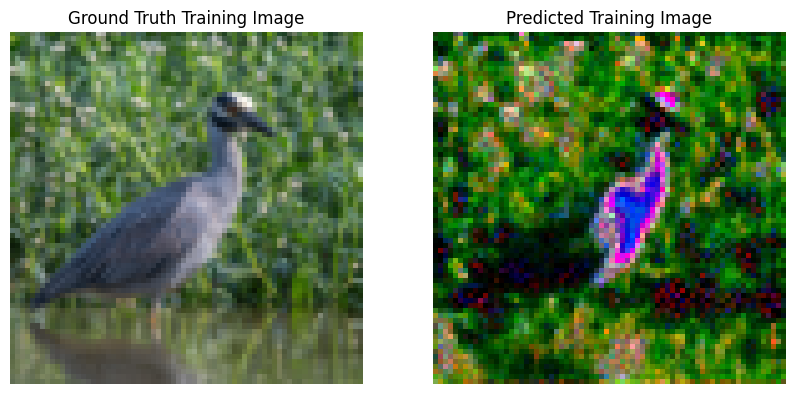

Epoch 131: _lambda1 (processed) = 0.8545360565185547, _lambda2 (processed) = 0.20922687649726868


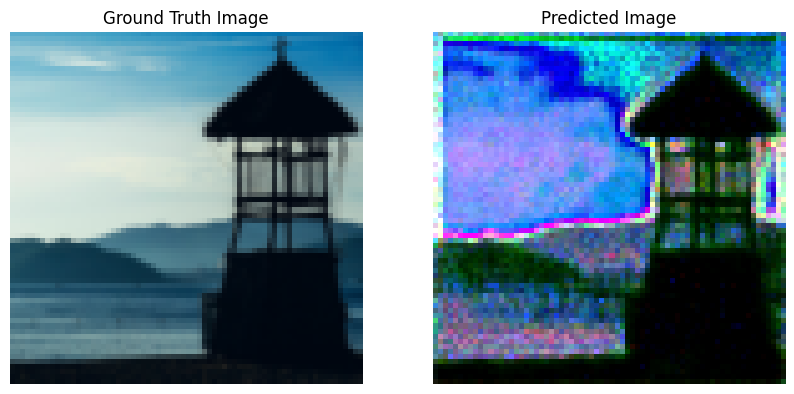

Epoch 131/150, Train Loss: 0.028511930955573916, Validation Loss: 0.04215705394744873
Epoch 132: _lambda1 (processed) = 0.8545275926589966, _lambda2 (processed) = 0.20924440026283264
Epoch 133: _lambda1 (processed) = 0.8545275926589966, _lambda2 (processed) = 0.20926976203918457
Epoch 134: _lambda1 (processed) = 0.8545243740081787, _lambda2 (processed) = 0.2092922031879425
Epoch 135: _lambda1 (processed) = 0.8545196056365967, _lambda2 (processed) = 0.20931391417980194
Epoch 136: _lambda1 (processed) = 0.8545140624046326, _lambda2 (processed) = 0.20933634042739868
Epoch 137: _lambda1 (processed) = 0.8545161485671997, _lambda2 (processed) = 0.20936205983161926
Epoch 138: _lambda1 (processed) = 0.8545216917991638, _lambda2 (processed) = 0.2093919813632965
Epoch 139: _lambda1 (processed) = 0.854509711265564, _lambda2 (processed) = 0.2094082534313202
Epoch 140: _lambda1 (processed) = 0.8545063138008118, _lambda2 (processed) = 0.20942990481853485


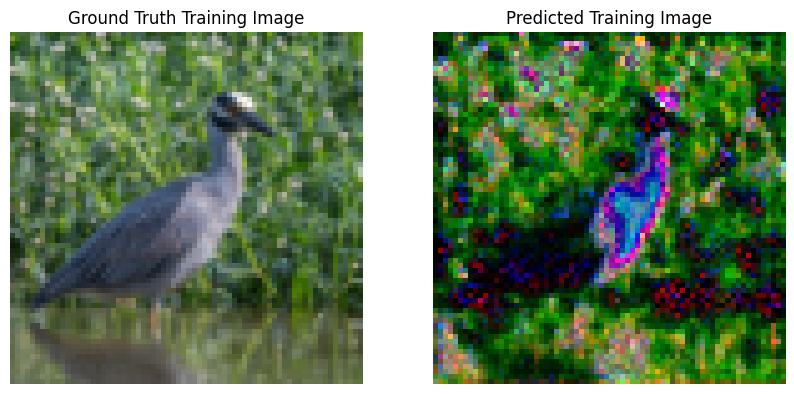

Epoch 141: _lambda1 (processed) = 0.854500949382782, _lambda2 (processed) = 0.209451824426651


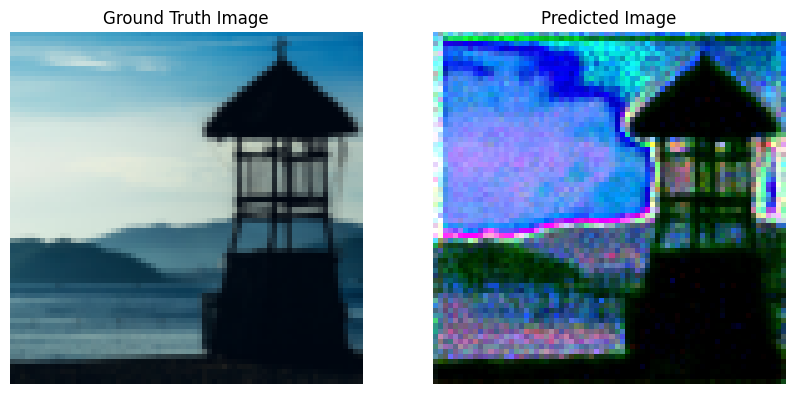

Epoch 141/150, Train Loss: 0.028180322842672467, Validation Loss: 0.04217618703842163
Epoch 142: _lambda1 (processed) = 0.854492723941803, _lambda2 (processed) = 0.2094699889421463
Epoch 143: _lambda1 (processed) = 0.8544891476631165, _lambda2 (processed) = 0.20949222147464752
Epoch 144: _lambda1 (processed) = 0.8544870615005493, _lambda2 (processed) = 0.20951437950134277
Epoch 145: _lambda1 (processed) = 0.8544834852218628, _lambda2 (processed) = 0.20953400433063507
Epoch 146: _lambda1 (processed) = 0.8544906377792358, _lambda2 (processed) = 0.20956292748451233
Epoch 147: _lambda1 (processed) = 0.8544904589653015, _lambda2 (processed) = 0.20958426594734192
Epoch 148: _lambda1 (processed) = 0.8544939756393433, _lambda2 (processed) = 0.20960739254951477
Epoch 149: _lambda1 (processed) = 0.8544983267784119, _lambda2 (processed) = 0.20963391661643982
Epoch 150: _lambda1 (processed) = 0.8545047044754028, _lambda2 (processed) = 0.20966003835201263
Epoch 150/150, Train Loss: 0.02930256584659

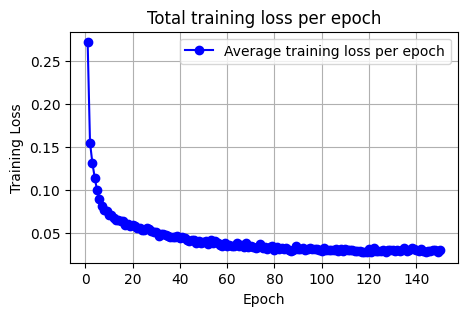

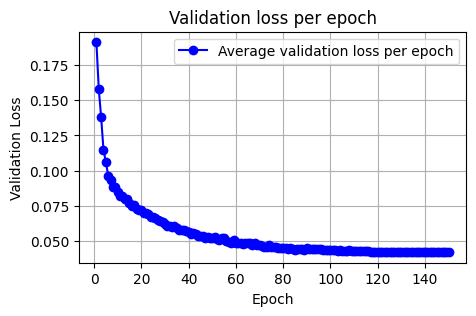

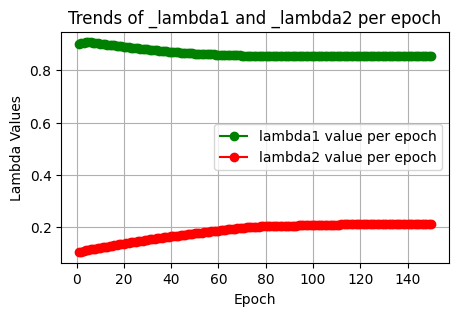

In [4]:
# Create an identity matrix for the dictionary (D)
height, width = normalised_size
num_pixels = 3 * height * width  # For RGB images
D = np.eye(num_pixels)

# Train the LISTA model
net = Overparametrization_train(
    X1, Y1, X2, Y2, D, numEpochs, numLayers,
    device, learning_rate, clear_train_dir, noisy_train_dir,
    noisy_valid_dir, clear_train_filenames, normalised_size
)

# Save the trained model

In [6]:
# Save the model
save_trained_overparametrization_model(net, D, numLayers, device, filepath='trained_overparametrization_model.pth')

print("Training and saving completed successfully.")


Model and parameters saved successfully to trained_overparametrization_model.pth
Training and saving completed successfully.
